## Image Data Augmentation by Keras
Ref to Francois Chollet's tutorial https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

### Goal of this exercise
- Augment a single channel 2d-image
- Augment a RGB 2d-image
- Zero padding


In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def zero_padding_2d(img,pad_size):
    # Assume the first 2 dim of img are the pixel positions
    x_size,y_size = img.shape[0],img.shape[1]
    img_ = np.zeros([x_size + 2*pad_size, y_size+2*pad_size,img.shape[2]])
    img_ [pad_size:pad_size+x_size,pad_size:pad_size+y_size,:]=img
    return img_

### Example 1

In [3]:
# Sample picture
target_x = 256
target_y = 256
img = image.load_img('C:/Program Files/MATLAB/R2016a/toolbox/vision/visiondata/elephant.jpg',target_size=(target_x,target_y))
# which returns a PIL image object

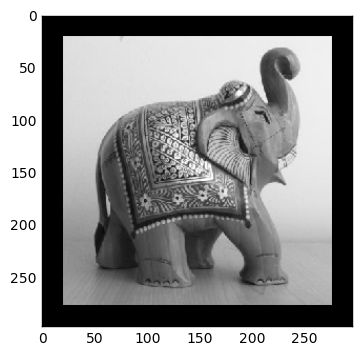

In [4]:
img=np.array(img)
img=zero_padding_2d(img,pad_size=20)
img = img.astype(np.uint8)
plt.imshow(img);plt.show() # I'm actually cheating as this picture is NOT a gray-scale picture :)

In [5]:
datagen = ImageDataGenerator(
        rotation_range=10.,
        width_shift_range=0.02,
        height_shift_range=0.02,
        shear_range=0.1,
        zoom_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest')

In [6]:
img = np.expand_dims(img,axis=0)

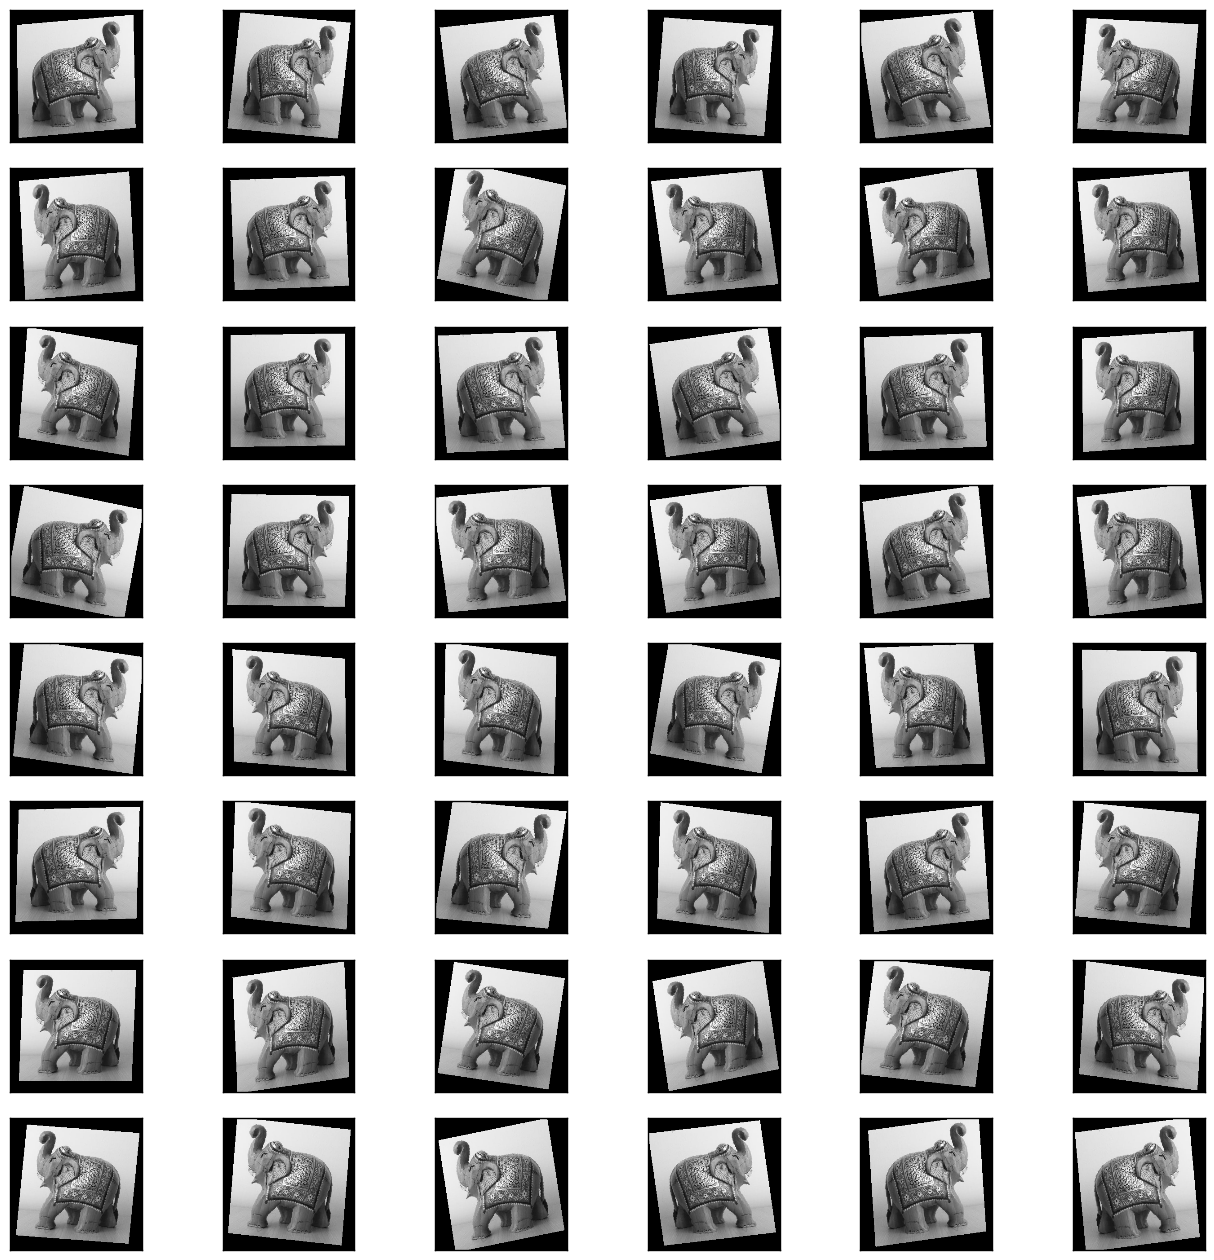

In [7]:
# Interactively play this cell over and over to see the effect of data augmentation
n_x = 8
n_y = 6
fig,ax = plt.subplots(n_x,n_y,figsize=[16,16])
for j in range(n_x * n_y):
    img_=datagen.flow(img, batch_size=1).next().astype(np.uint8)
    ax[j//n_y,j%n_y].set_xticks([])
    ax[j//n_y,j%n_y].set_yticks([])
    ax[j//n_y,j%n_y].imshow(img_[0,:,:,:])    
plt.show()

### Example 2

In [8]:
# another sample picture
img = image.load_img("../data/Zoorashia_elephant.jpg")
# which returns a PIL image objectls 

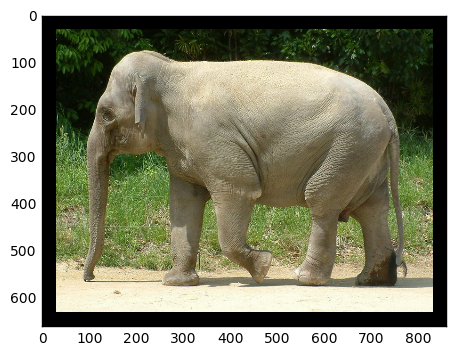

In [9]:
img=np.array(img)
img=zero_padding_2d(img,pad_size=30).astype(np.uint8)
plt.imshow(img);plt.show()

In [10]:
img = img.reshape(1,img.shape[0],img.shape[1],3)
img.dtype

dtype('uint8')

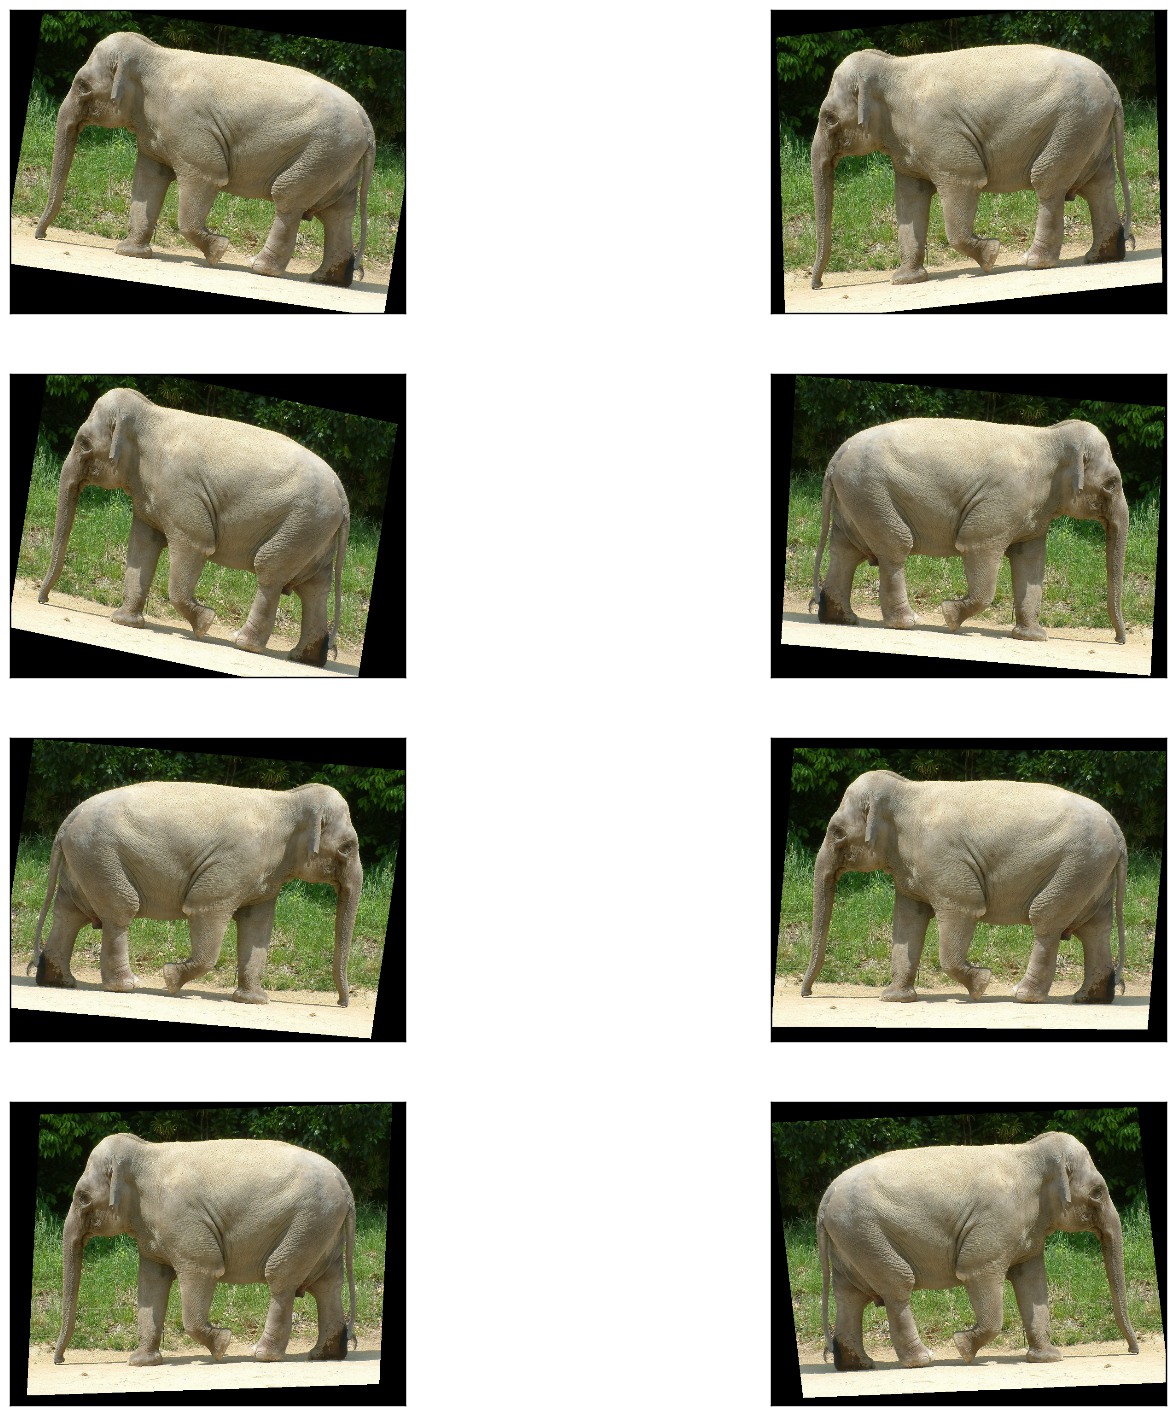

In [11]:
# Note the tyep conversion is crucial import. Ref https://github.com/fchollet/keras/issues/5846
n_x = 4
n_y = 2
fig,ax = plt.subplots(n_x,n_y,figsize=[18,18])
for j in range(n_x * n_y):
    img_=datagen.flow(img, batch_size=1).next().astype(np.uint8)
    ax[j//n_y,j%n_y].set_xticks([])
    ax[j//n_y,j%n_y].set_yticks([])
    ax[j//n_y,j%n_y].imshow(img_[0,:,:,:])    
plt.show()